In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dask.dataframe.methods import drop_columns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.metrics import mean_absolute_error

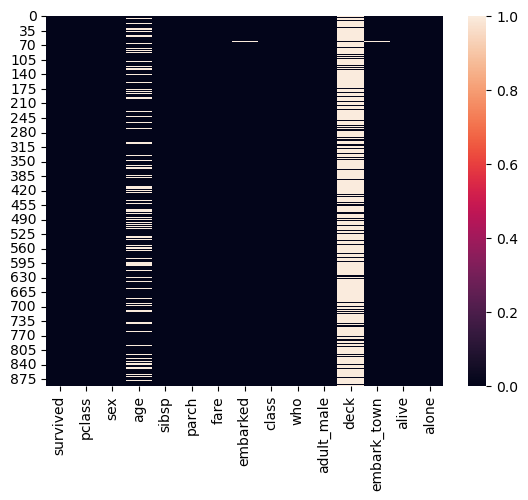

In [12]:
titanic = sns.load_dataset("titanic")
sns.heatmap(titanic.isna())
plt.show()

In [13]:
drop_rows = titanic.dropna(subset=['age'])
drop_columns = titanic.drop(columns=['deck'])
drop_threst = titanic.dropna(thresh=14)

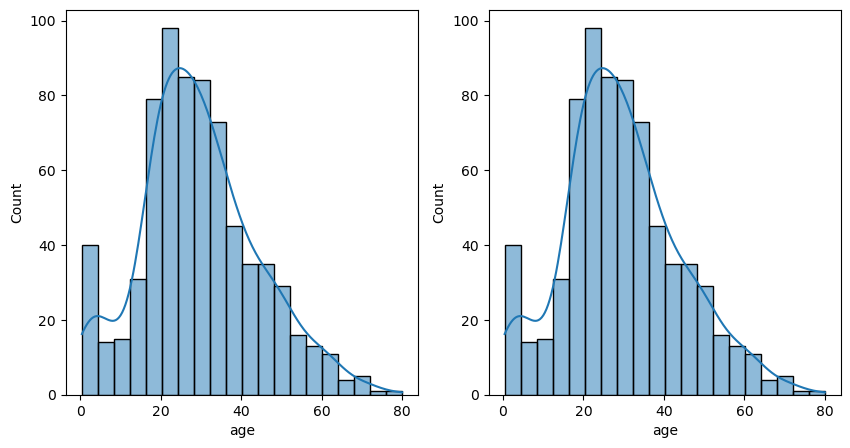

In [14]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.histplot(titanic['age'],kde=True,ax=ax[0])
sns.histplot(drop_rows['age'],kde=True,ax=ax[1])
plt.show()

In [15]:
df_del = titanic.dropna()
print("After Deletion Shape:", df_del.shape)

After Deletion Shape: (182, 15)


In [16]:
imp_mean = SimpleImputer(strategy="mean")
titanic['age_mean'] = imp_mean.fit_transform(titanic[['age']])
imp_median = SimpleImputer(strategy="median")
titanic['age_median'] = imp_median.fit_transform(titanic[['age']])
imp_mode = SimpleImputer(strategy="most_frequent")
titanic['age_mode'] = imp_mode.fit_transform(titanic[['age']])

In [17]:
titanic['age_ffill'] = titanic['age'].fillna(method='ffill')
titanic['age_bfill'] = titanic['age'].fillna(method='bfill')

C:\Users\Roktim\AppData\Local\Temp\ipykernel_21200\68891657.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic['age_ffill'] = titanic['age'].fillna(method='ffill')
C:\Users\Roktim\AppData\Local\Temp\ipykernel_21200\68891657.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic['age_bfill'] = titanic['age'].fillna(method='bfill')


In [ ]:
titanic['age_knn'] = knn.fit_transform(titanic[['age','fare']])[:,0]

plt.figure(figsize=(10,5))
sns.kdeplot(titanic['age'], label='Original (with NaN)')
sns.kdeplot(titanic['age_mean'], label='Mean Imputed')
sns.kdeplot(titanic['age_median'], label='Median Imputed')
sns.kdeplot(titanic['age_knn'], label='KNN Imputed')
plt.legend(); plt.title("Age Imputation Comparison"); plt.show()

NameError: name 'knn' is not defined

In [ ]:
titanic['age_linear'] = titanic['age'].interpolate(mothod='linear')
print(titanic.loc[titanic['age'].isna(),['age','age_linear']].head())

In [ ]:
# Polynomial interpolation (order 2 = quadratic)
titanic['age_poly'] = titanic['age'].interpolate(method='polynomial', order=2)
# Spline interpolation (cubic smoothing)
titanic['age_spline'] = titanic['age'].interpolate(method='spline', order=3)

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(titanic['age'], label='Original (with NaN)')
sns.kdeplot(titanic['age_linear'], label='Linear')
sns.kdeplot(titanic['age_poly'], label='Polynomial (deg=2)')
sns.kdeplot(titanic['age_spline'], label='Spline (deg=3)')
plt.legend()
plt.title("Age Imputation: Interpolation Methods")
plt.show()

In [ ]:
from scipy.stats import zscore
titanic['fare_z'] = zscore(titanic['fare'].fillna(0))
#As fare has null value.
#So we are replacing the null datapoints in the fare column with 0 using fillna()
#Then the modified fare column(raw score) - mean of the fare(raw score) / Standard Deviation(SD)
outliers_z = titanic[np.abs(titanic['fare_z'])>3] #now we are performing absolute threshold according to the mathmetical formula.
print("Z-score outliers in fare:", outliers_z.shape[0])

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=titanic['fare'])
# sns.scatterplot(titanic['fare'])
plt.title("Boxplot of Fare (Outliers appear as distant points)")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(titanic)), titanic['fare'], label="Data", alpha=0.7)
plt.scatter(outliers_z.index, outliers_z['fare'], color='red', label="Z-score Outliers", marker='x', s=60)
plt.xlabel("Passenger Index")
plt.ylabel("Fare")
plt.title("Fare with Z-score Outliers Highlighted")
plt.legend()
plt.show()